## `Import libs`

In [89]:
# Common Libs
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline

# Metrices
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

## `Load Dataset`

In [90]:
cards = pd.read_csv('creditcard.csv')
cards

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## `Explore Dataset`

In [270]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [92]:
cards.shape

(284807, 31)

In [111]:
cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [93]:
valid = cards[cards['Class'] == 0]

fraud = cards[cards['Class'] == 1]

In [94]:
print('the num of valid cards is :',len(valid))
print('the num of fraud cards is :',len(fraud))

the num of valid cards is : 284315
the num of fraud cards is : 492


In [95]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [96]:
cards.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [97]:
cards.duplicated().sum()

1081

In [98]:
cards.drop_duplicates(inplace = True)

In [99]:
cards.duplicated().sum()

0

## `Data Preprocessing`

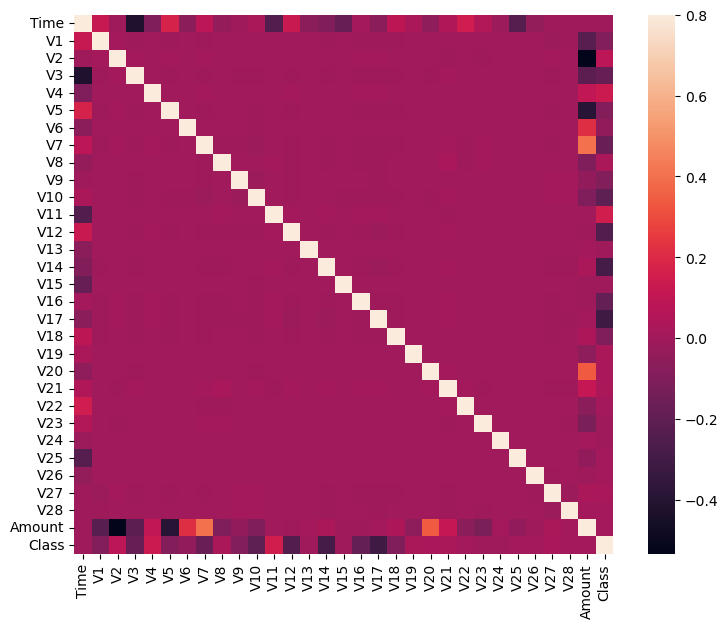

In [272]:
fig = plt.figure(figsize = (9, 7)) 
 
sns.heatmap(cards.corr(), vmax = .8, square = True) 
plt.show() 

### Spliting Dataset

In [243]:
X = cards.drop('Class', axis = 1)
y = cards['Class']

In [244]:
X.shape, y.shape

((283726, 30), (283726,))

In [245]:
#y = pd.factorize(cards['Class'])[0].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [246]:
print('X_train shape is :', X_train.shape)
print('X_test shape is :', X_test.shape)
print('y_train shape is :', y_train.shape)
print('y_test shape is :', y_test.shape)

X_train shape is : (212794, 30)
X_test shape is : (70932, 30)
y_train shape is : (212794,)
y_test shape is : (70932,)


In [247]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12490,21876.0,0.688618,-0.822579,0.898360,0.737250,-0.801228,0.685497,-0.651980,0.342440,1.711003,...,0.157386,0.063451,-0.063368,-0.045120,-0.353307,-0.175701,0.377738,-0.052908,0.036327,215.00
34872,37863.0,-1.093749,1.021302,1.263211,-0.967866,-0.122500,0.554127,-0.842832,-2.479357,0.180269,...,0.739965,-1.229363,0.818690,-0.138811,-0.515225,-0.070506,1.033592,0.278927,0.200193,15.99
221780,142700.0,1.958631,-0.608854,-0.338081,0.318844,-0.742376,-0.042969,-0.866790,0.208547,1.227744,...,-0.263216,0.181981,0.659648,0.134795,-0.373369,-0.327587,0.578986,-0.028705,-0.063657,9.19
273685,165654.0,1.767196,0.251674,-0.223036,3.258201,1.086003,2.703686,-0.713783,0.726881,-0.852586,...,-0.250628,-0.108248,-0.204790,0.451670,-1.008504,-0.662697,-0.302633,0.057914,-0.044046,0.79
179738,124221.0,1.871251,0.115794,-2.004520,1.081772,0.887126,-0.640529,0.814612,-0.337673,-0.557538,...,-0.036001,0.233055,0.574186,-0.061234,0.729226,0.440975,-0.545853,-0.047720,-0.050960,85.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,75794.0,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,849.40
260136,159419.0,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,0.89
132427,79983.0,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,4.50
147428,88536.0,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,39.48


### Scale X Data

In [248]:
SC = StandardScaler()

X_train = SC.fit_transform(X_train) 
X_test = SC.transform(X_test)

In [249]:
X_train

array([[-1.53529559,  0.35176206, -0.50079549, ..., -0.13882583,
         0.10965825,  0.50720799],
       [-1.19865435, -0.56663492,  0.62453953, ...,  0.69914344,
         0.61212475, -0.28952286],
       [ 1.0089179 ,  1.00615952, -0.37035759, ..., -0.0777069 ,
        -0.19692383, -0.31674647],
       ...,
       [-0.31172566,  0.6458217 , -0.02896951, ...,  0.11077403,
         0.07515426, -0.33552275],
       [-0.13162355,  1.01866598, -0.08081096, ..., -0.1861791 ,
        -0.17256979, -0.19548132],
       [-0.38384652, -0.24273786,  0.50072703, ..., -0.33570689,
        -0.14781419, -0.35353837]])

## `Bulding RF Model`

### `Random Forest Classifier`

In [250]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [251]:
clf = RandomForestClassifier()

In [252]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [253]:
# y_test = y_test.reshape(-1, 1)
y_pred_clf = clf.predict(X_test)

#### Evaluate Random Forest classifier model

In [257]:
n_outliers = len(fraud) 
n_errors = (y_pred_clf != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test, y_pred_clf) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred_clf) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred_clf) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred_clf) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred_clf) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9995488637004455
The precision is 0.9545454545454546
The recall is 0.75
The F1-Score is 0.84
The Matthews correlation coefficient is0.8459070713681474


In [255]:
confusion_matrix(y_test, y_pred_clf)

# TN FN
# FP TP   

array([[70816,     4],
       [   28,    84]], dtype=int64)

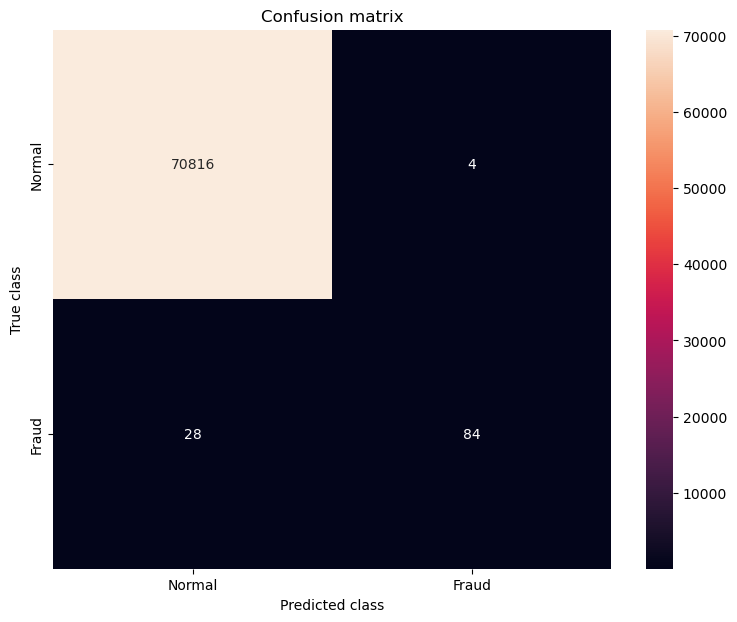

In [273]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred_clf) 
plt.figure(figsize =(9, 7)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

### `Logistic Regression`

In [258]:
LR = LogisticRegression()

In [259]:
LR.fit(X_train, y_train)

LogisticRegression()

In [260]:
y_pred_LR = LR.predict(X_test)

#### Evaluate Logistic Regression model

In [264]:
n_outliers = len(fraud) 
n_errors = (y_pred_LR != y_test).sum() 
print("The model used is Logistic Regression") 
  
acc = accuracy_score(y_test, y_pred_LR) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred_LR) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred_LR) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred_LR) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred_LR) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The model used is Logistic Regression
The accuracy is 0.9991682174476963
The precision is 0.8732394366197183
The recall is 0.5535714285714286
The F1-Score is 0.6775956284153005
The Matthews correlation coefficient is 0.6949092852185791


In [261]:
confusion_matrix(y_test, y_pred_LR)

# TN FN
# FP TP  

array([[70811,     9],
       [   50,    62]], dtype=int64)

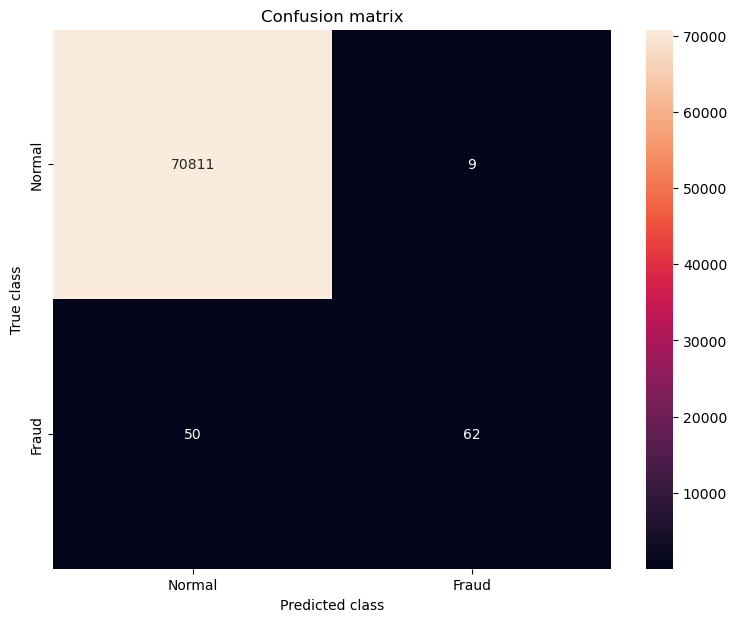

In [274]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred_LR) 
plt.figure(figsize =(9, 7)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 